In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#reorganize code
#add more imports that are needed



from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [131]:
pd.set_option('display.max_columns', None)  
p = pd.read_csv("fetal_health.csv")



# Exploratory Analysis

In [132]:
p

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [133]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [134]:
p.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### Data Cleansing/Wrangling

In [135]:
# Null data points and missing data
p.isnull().sum()
p.isna().sum()



baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [158]:
# for zeros in data; we dont need to use this because our data needs the zero inputs. Zeros are proper measurements.

#p.accelerations == 0
#p.accelerations == 0
#p.fetal_movement == 0

0        True
1       False
2       False
3       False
4       False
        ...  
2121     True
2122    False
2123    False
2124    False
2125    False
Name: accelerations, Length: 2126, dtype: bool

In [140]:
#sns.countplot(data= p, x="fetal_health")
p['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

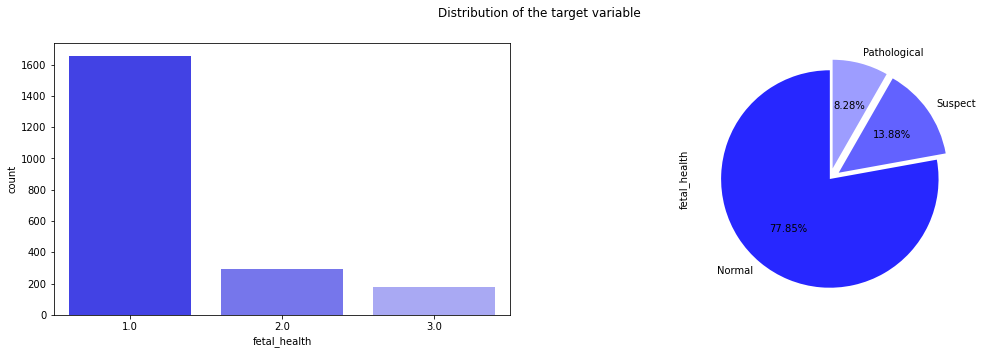

In [141]:

#maybe put the count in the graph instead? but this show that there is a heavy unbalance in the data; so we will do unsampling to balance everything out. 
#maybe change names of the classifications? Do this somewhere along this report

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(x=p['fetal_health'], palette=['#2727ff','#6262ff','#9d9dff'])
plt.subplot(1,2,2)
p['fetal_health'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0,0.1,0.1], 
                                       startangle=90, colors=['#2727ff','#6262ff','#9d9dff'],
                                      labels = ['Normal','Suspect','Pathological'])
plt.suptitle('Distribution of the target variable')
plt.show()

<AxesSubplot:>

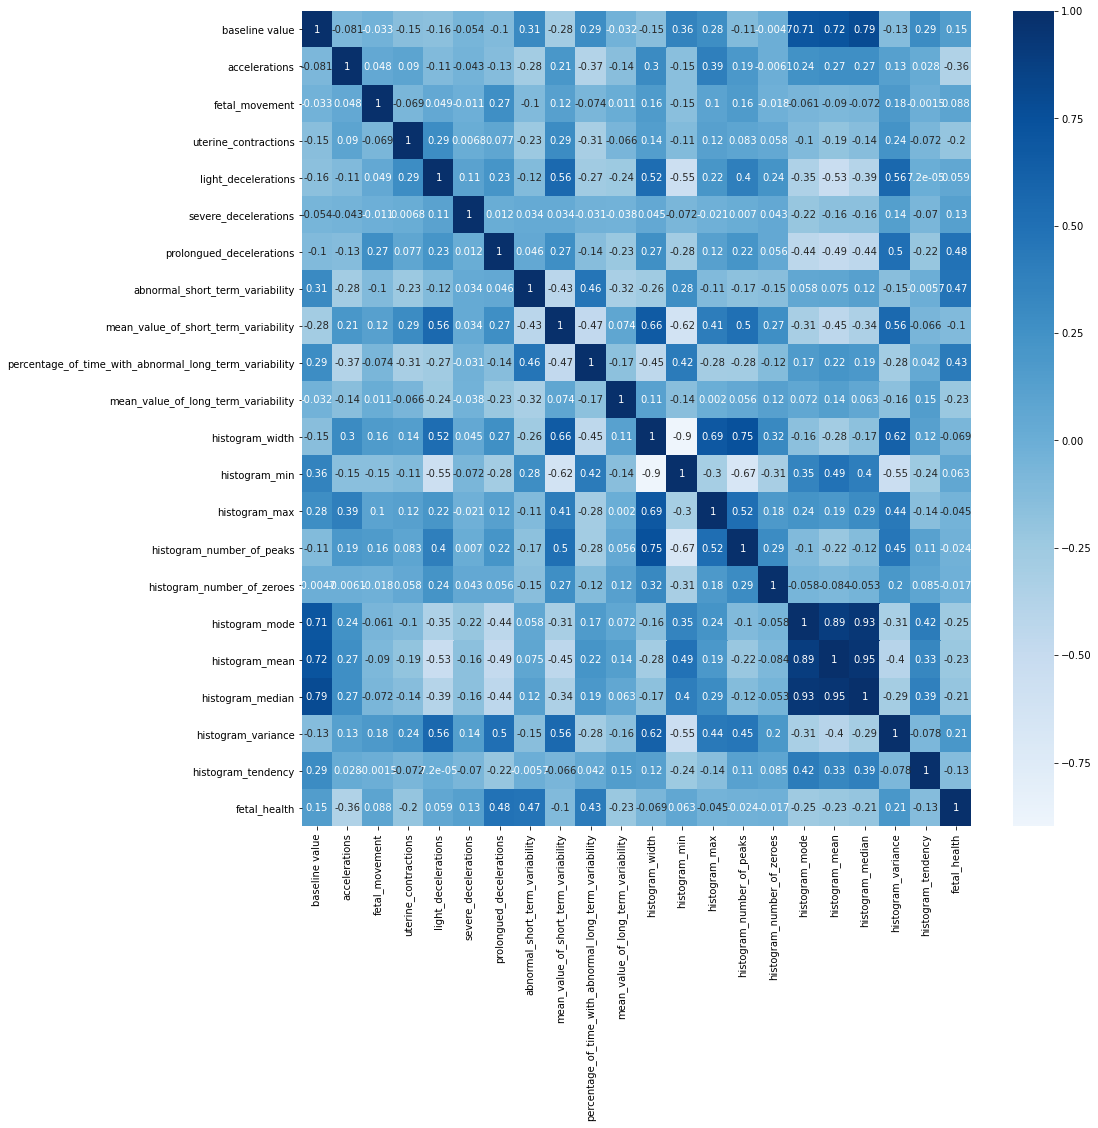

In [142]:
#correlation matrix
corrmat= p.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap="Blues", center=0)

#highest correlations to (p) fetal health - 

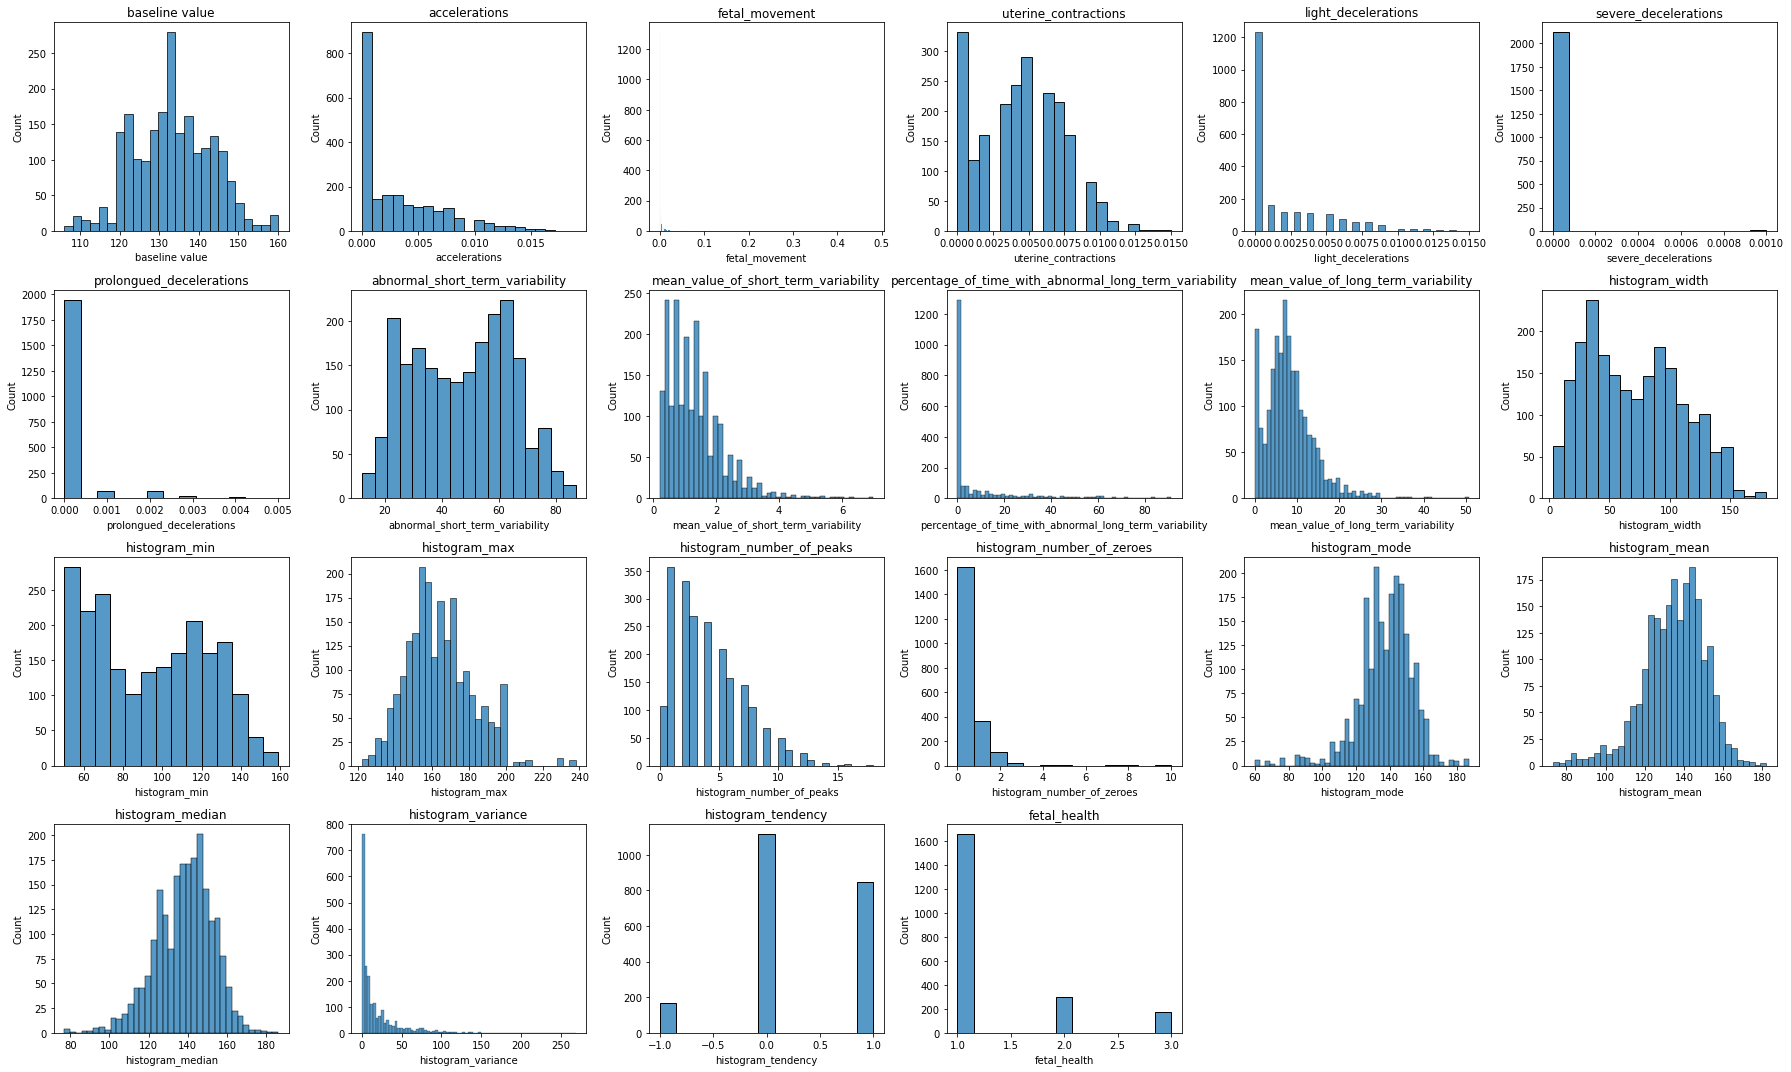

In [143]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(p.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=p[column])
    plt.title(column)

plt.tight_layout()
plt.show()

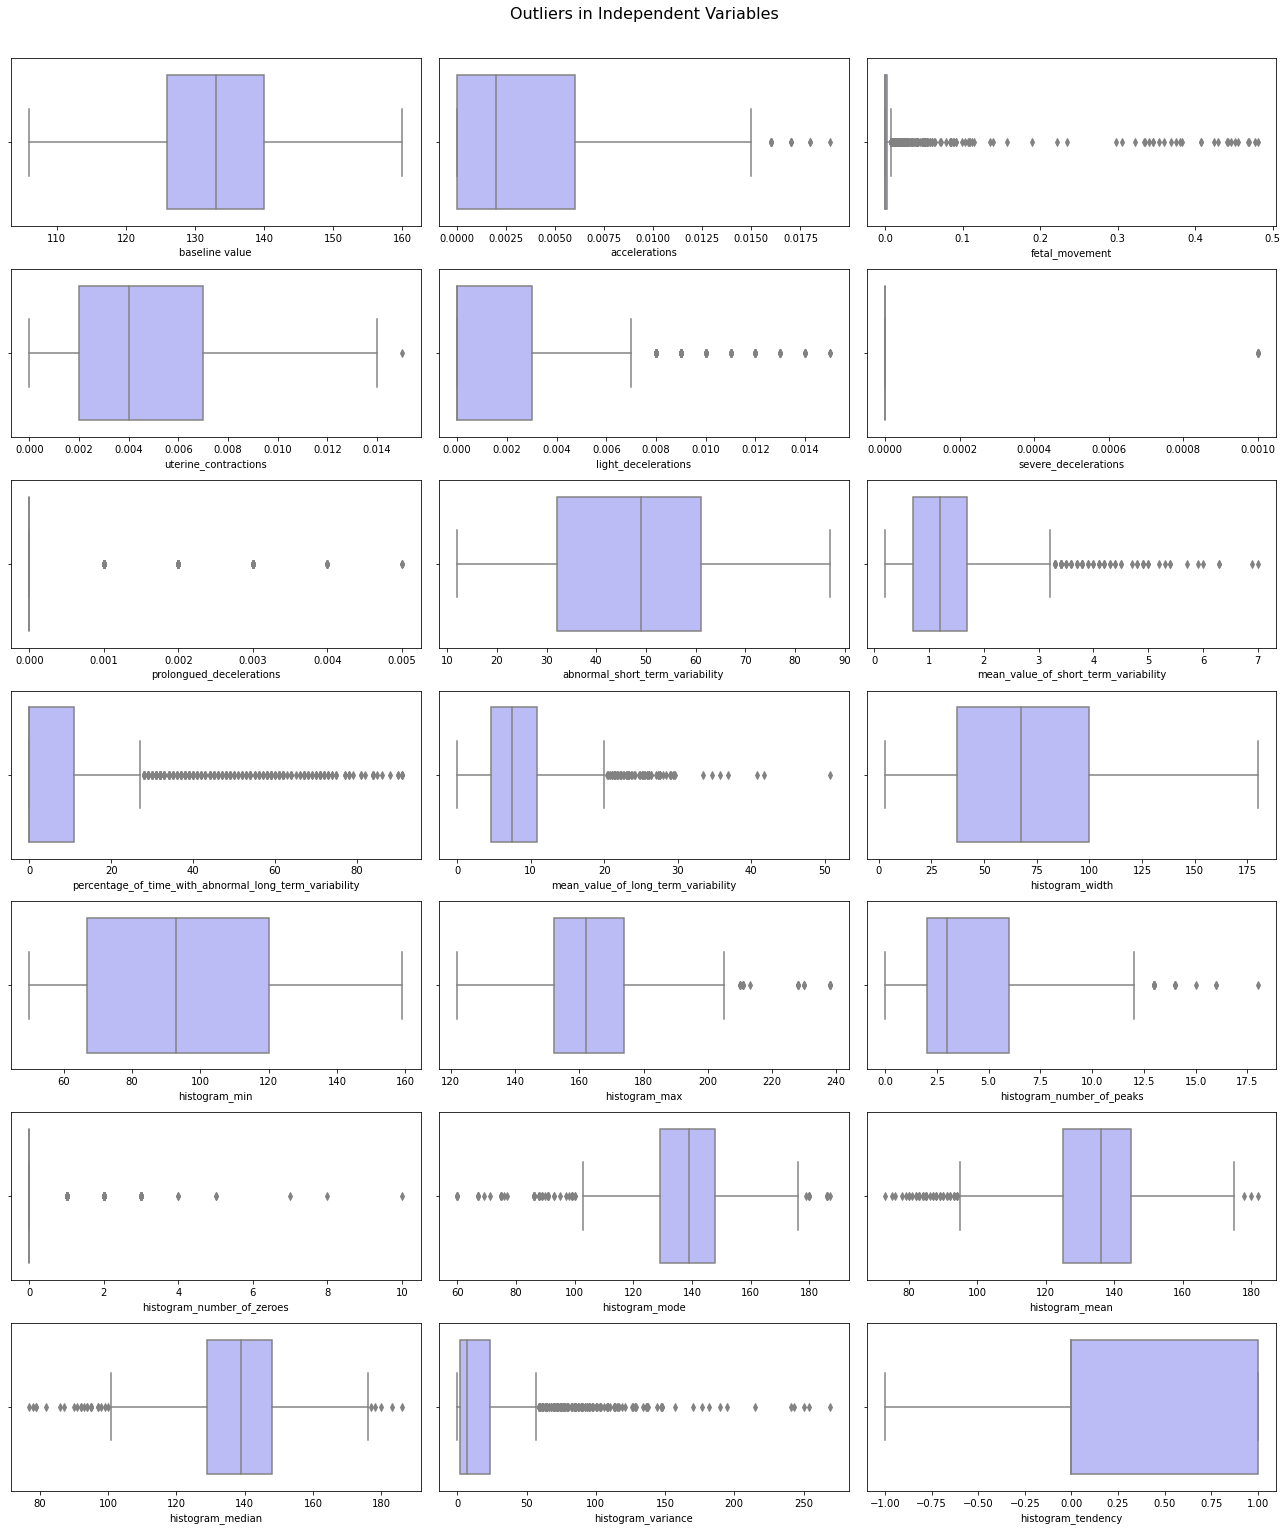

In [144]:
plt.figure(figsize=(18,21))
for i,col in enumerate(p.columns[:-1]):
    plt.subplot(7,3,i+1)
    sns.boxplot(x=p[col], color='#b1b1ff')
plt.suptitle('Outliers in Independent Variables', size=16, y=1.01)
plt.tight_layout()
plt.show()

### Upsampling

In [145]:
#because there is such an imbalance - explain why imbalance isnt good and we should definitely do something about this in report

# Separate majority and minority classes
highclass_1 = p[p.fetal_health==1]
lowclass_2 = p[p.fetal_health==2]
lowclass_3 = p[p.fetal_health==3]

# Upsample minority class 
lowclass2_upsampled = lowclass_2.sample(len(highclass_1),
                                      replace=True,
                                      random_state=123)


lowclass3_upsampled = lowclass_3.sample(len(highclass_1),
                                        replace=True,
                                        random_state=123)

# Combine majority class with upsampled minority class
p_upsampled = pd.concat([highclass_1, lowclass2_upsampled, lowclass3_upsampled])

# Display new class counts
p_upsampled['fetal_health'].value_counts()
#p_upsampled.fetal_health.value_counts()

3.0    1655
2.0    1655
1.0    1655
Name: fetal_health, dtype: int64

In [146]:
p_upsampled

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
12,131.0,0.005,0.072,0.008,0.003,0.0,0.000,28.0,1.4,0.0,12.9,66.0,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,128.0,0.000,0.025,0.003,0.003,0.0,0.003,34.0,2.4,0.0,3.6,145.0,54.0,199.0,11.0,1.0,75.0,98.0,86.0,144.0,-1.0,3.0
597,148.0,0.000,0.003,0.005,0.000,0.0,0.000,77.0,0.5,4.0,10.2,32.0,140.0,172.0,1.0,0.0,150.0,150.0,151.0,1.0,-1.0,3.0
1681,110.0,0.003,0.002,0.006,0.007,0.0,0.002,68.0,3.1,0.0,0.0,133.0,60.0,193.0,8.0,0.0,91.0,83.0,95.0,42.0,-1.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0


In [147]:
p_upsampled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,4965.0,135.084391,10.075937,106.0,128.0,134.000,143.000,160.000
accelerations,4965.0,0.001547,0.002972,0.0,0.0,0.000,0.002,0.019
fetal_movement,4965.0,0.013575,0.059262,0.0,0.0,0.000,0.003,0.481
uterine_contractions,4965.0,0.003666,0.003185,0.0,0.0,0.003,0.006,0.015
light_decelerations,4965.0,0.002091,0.003326,0.0,0.0,0.000,0.003,0.015
severe_decelerations,4965.0,0.000012,0.000109,0.0,0.0,0.000,0.000,0.001
prolongued_decelerations,4965.0,0.000481,0.001025,0.0,0.0,0.000,0.000,0.005
abnormal_short_term_variability,4965.0,56.444713,17.011254,12.0,45.0,61.000,67.000,87.000
mean_value_of_short_term_variability,4965.0,1.218348,1.004065,0.2,0.4,0.900,1.800,7.000
percentage_of_time_with_abnormal_long_term_variability,4965.0,18.849748,25.716783,0.0,0.0,4.000,33.000,91.000


In [148]:
p_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4965 entries, 1 to 472
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          4965 non-null   float64
 1   accelerations                                           4965 non-null   float64
 2   fetal_movement                                          4965 non-null   float64
 3   uterine_contractions                                    4965 non-null   float64
 4   light_decelerations                                     4965 non-null   float64
 5   severe_decelerations                                    4965 non-null   float64
 6   prolongued_decelerations                                4965 non-null   float64
 7   abnormal_short_term_variability                         4965 non-null   float64
 8   mean_value_of_short_term_variability   

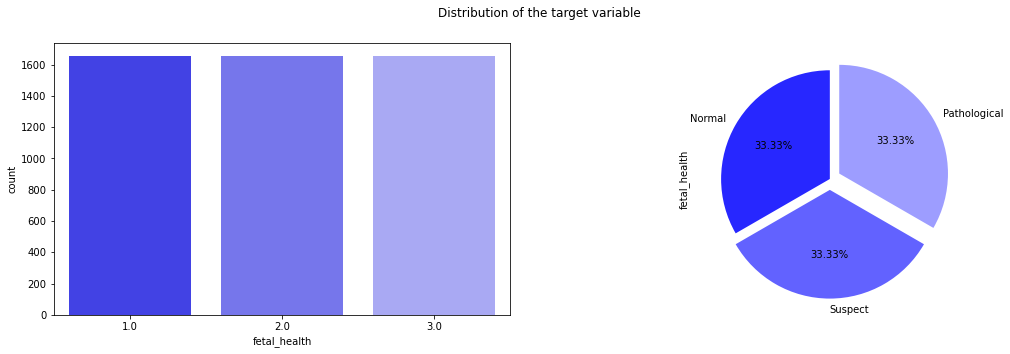

In [149]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(x=p_upsampled['fetal_health'], palette=['#2727ff','#6262ff','#9d9dff'])
plt.subplot(1,2,2)
p_upsampled['fetal_health'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0,0.1,0.1], 
                                       startangle=90, colors=['#2727ff','#6262ff','#9d9dff'],
                                      labels = ['Normal','Suspect','Pathological'])
plt.suptitle('Distribution of the target variable')
plt.show()

<AxesSubplot:>

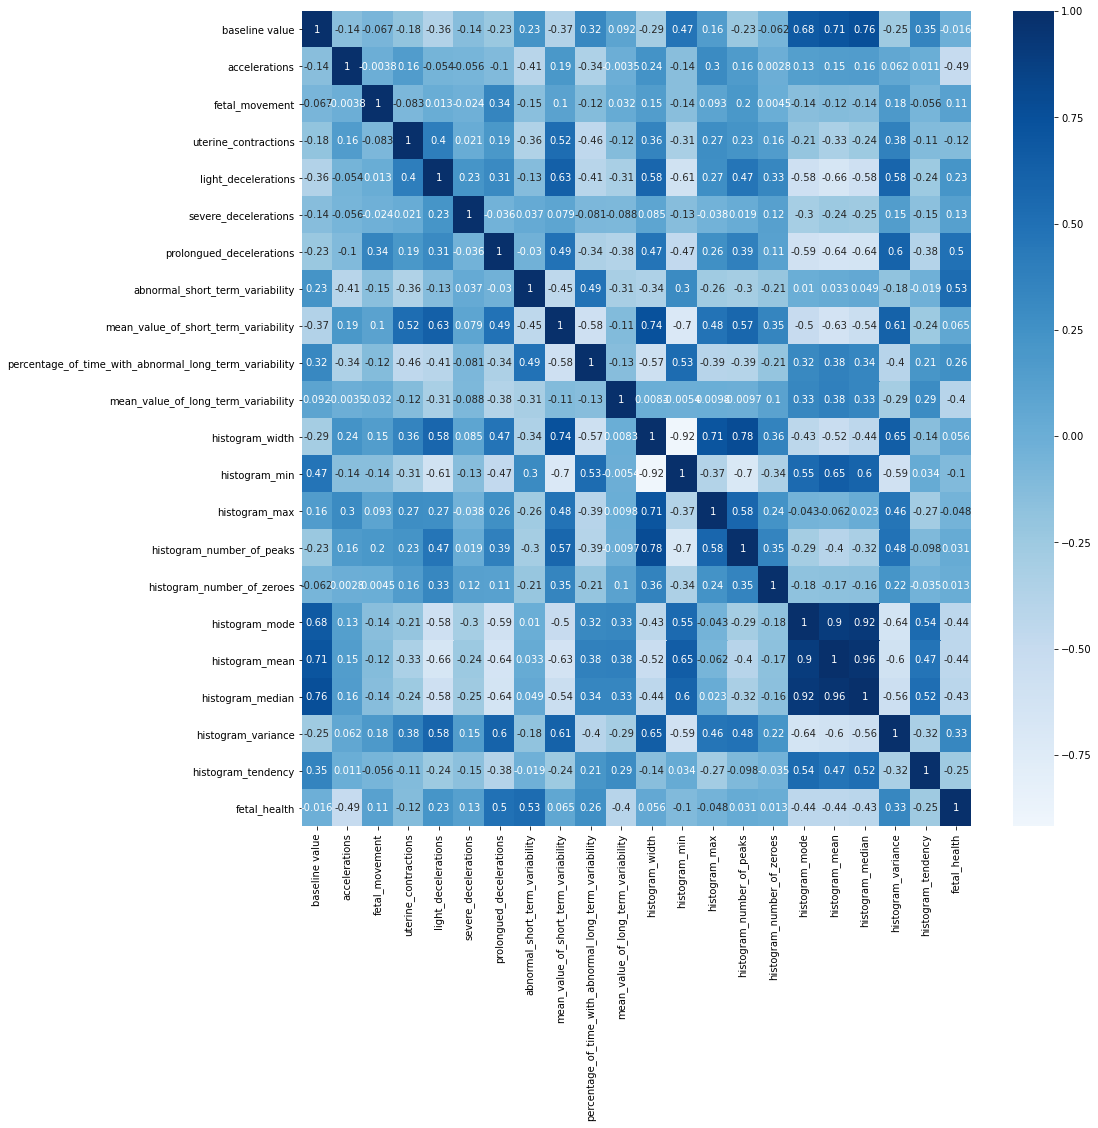

In [150]:
#correlation matrix
corrmat= p_upsampled.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap="Blues", center=0)

#highest correlations to fetal health - 

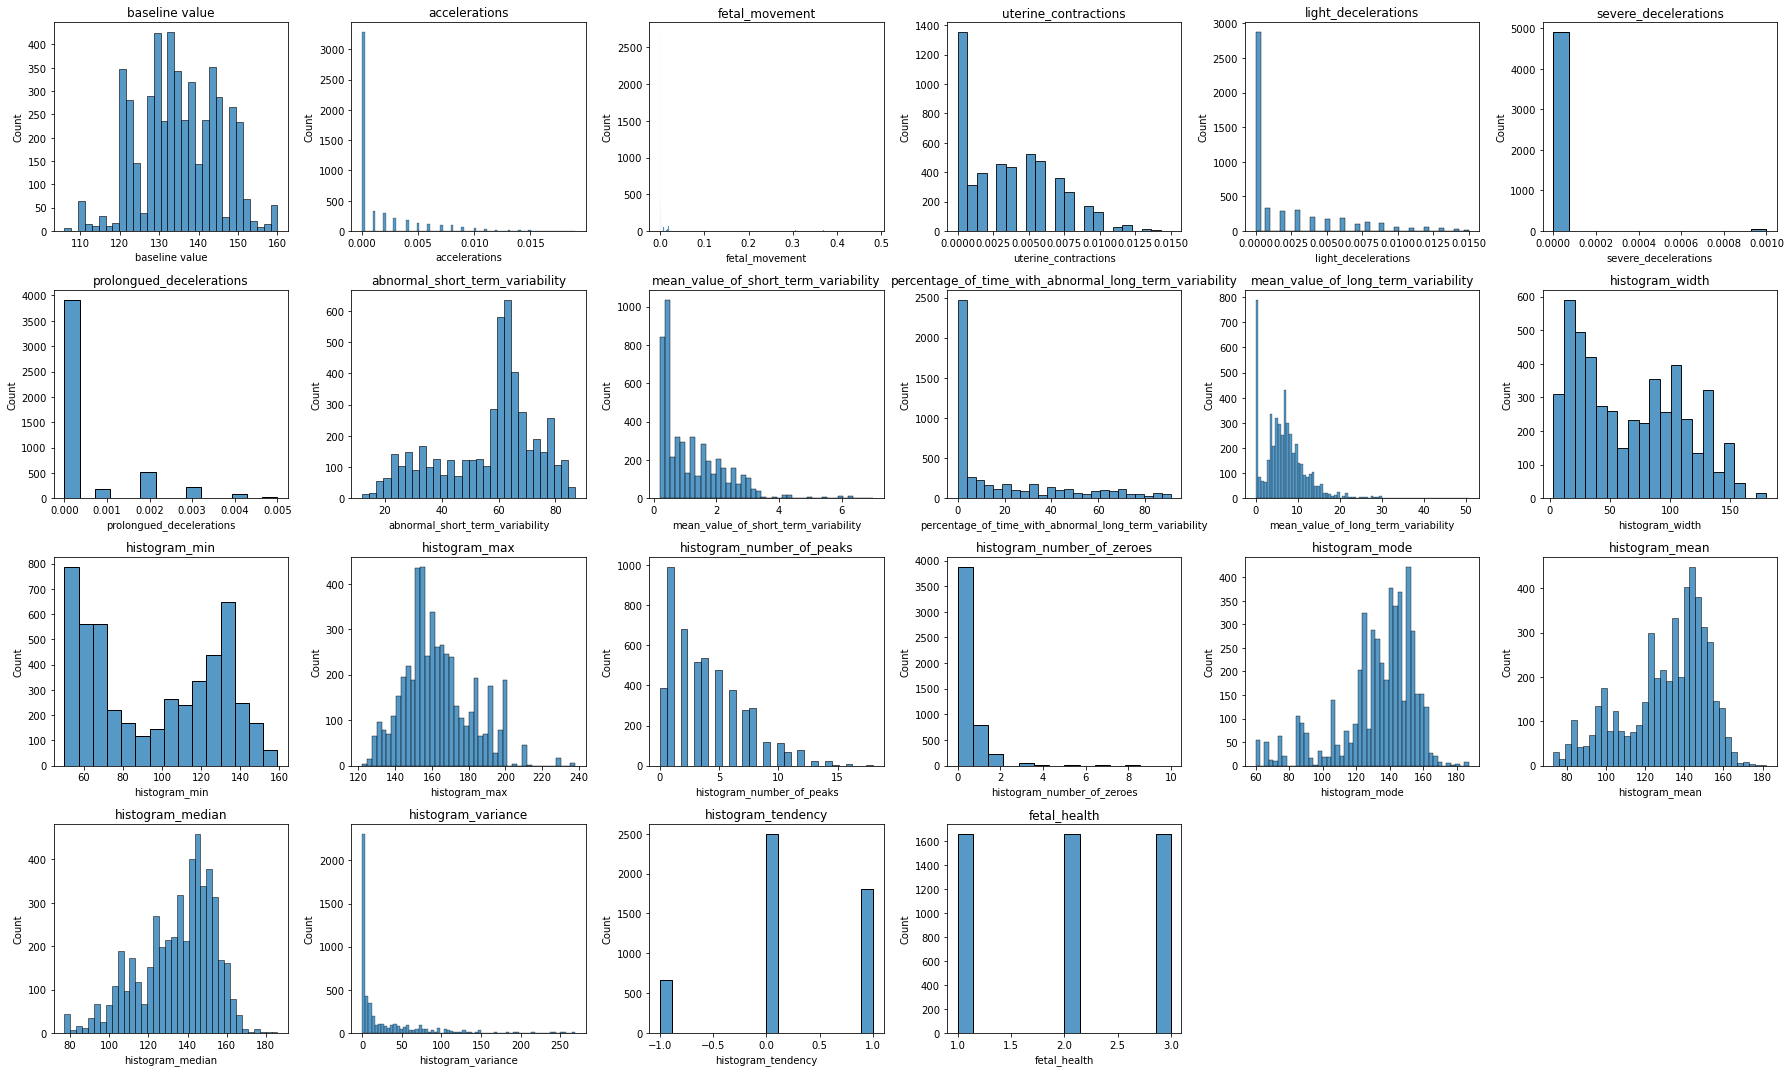

In [151]:

plt.figure(figsize=(25, 15))

for i, column in enumerate(p_upsampled.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=p_upsampled[column])
    plt.title(column)

plt.tight_layout()
plt.show()

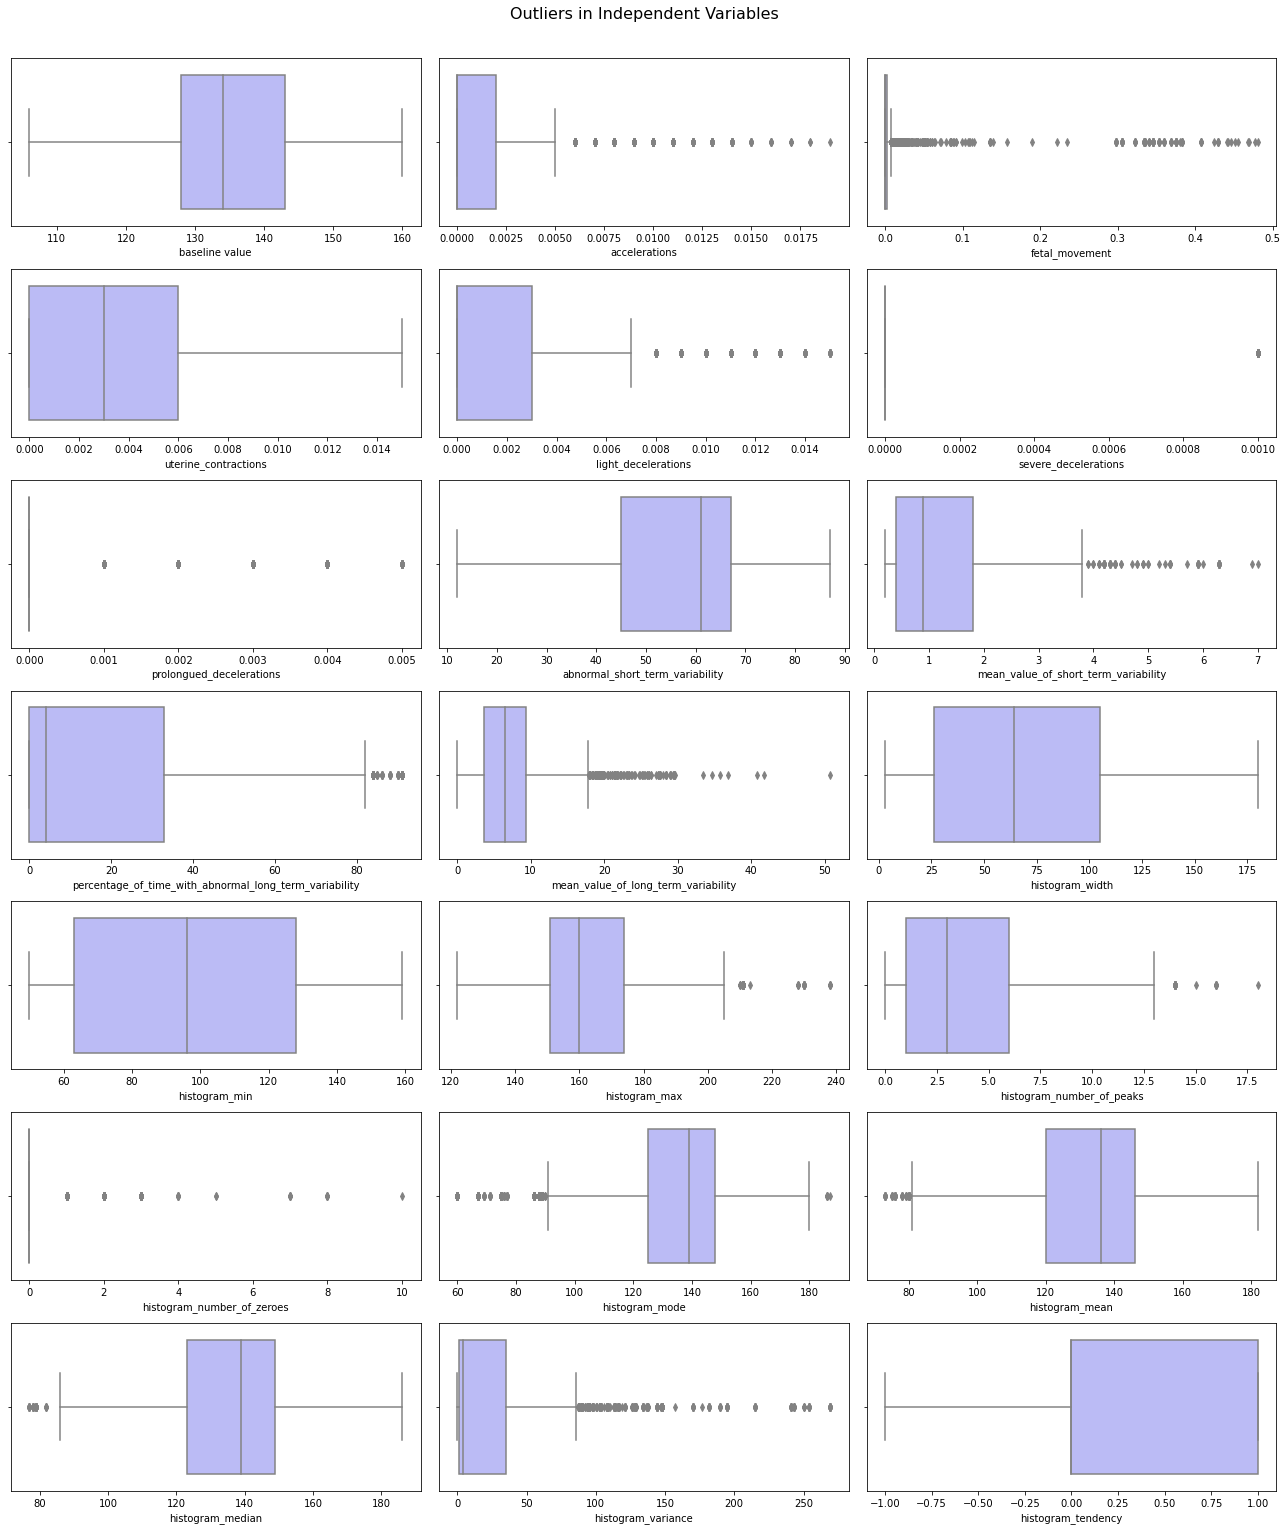

In [152]:
#outliers check?
plt.figure(figsize=(18,21))
for i,col in enumerate(p_upsampled.columns[:-1]):
    plt.subplot(7,3,i+1)
    sns.boxplot(x=p_upsampled[col], color='#b1b1ff')
plt.suptitle('Outliers in Independent Variables', size=16, y=1.01)
plt.tight_layout()
plt.show()

C:\Users\ainaa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ainaa\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


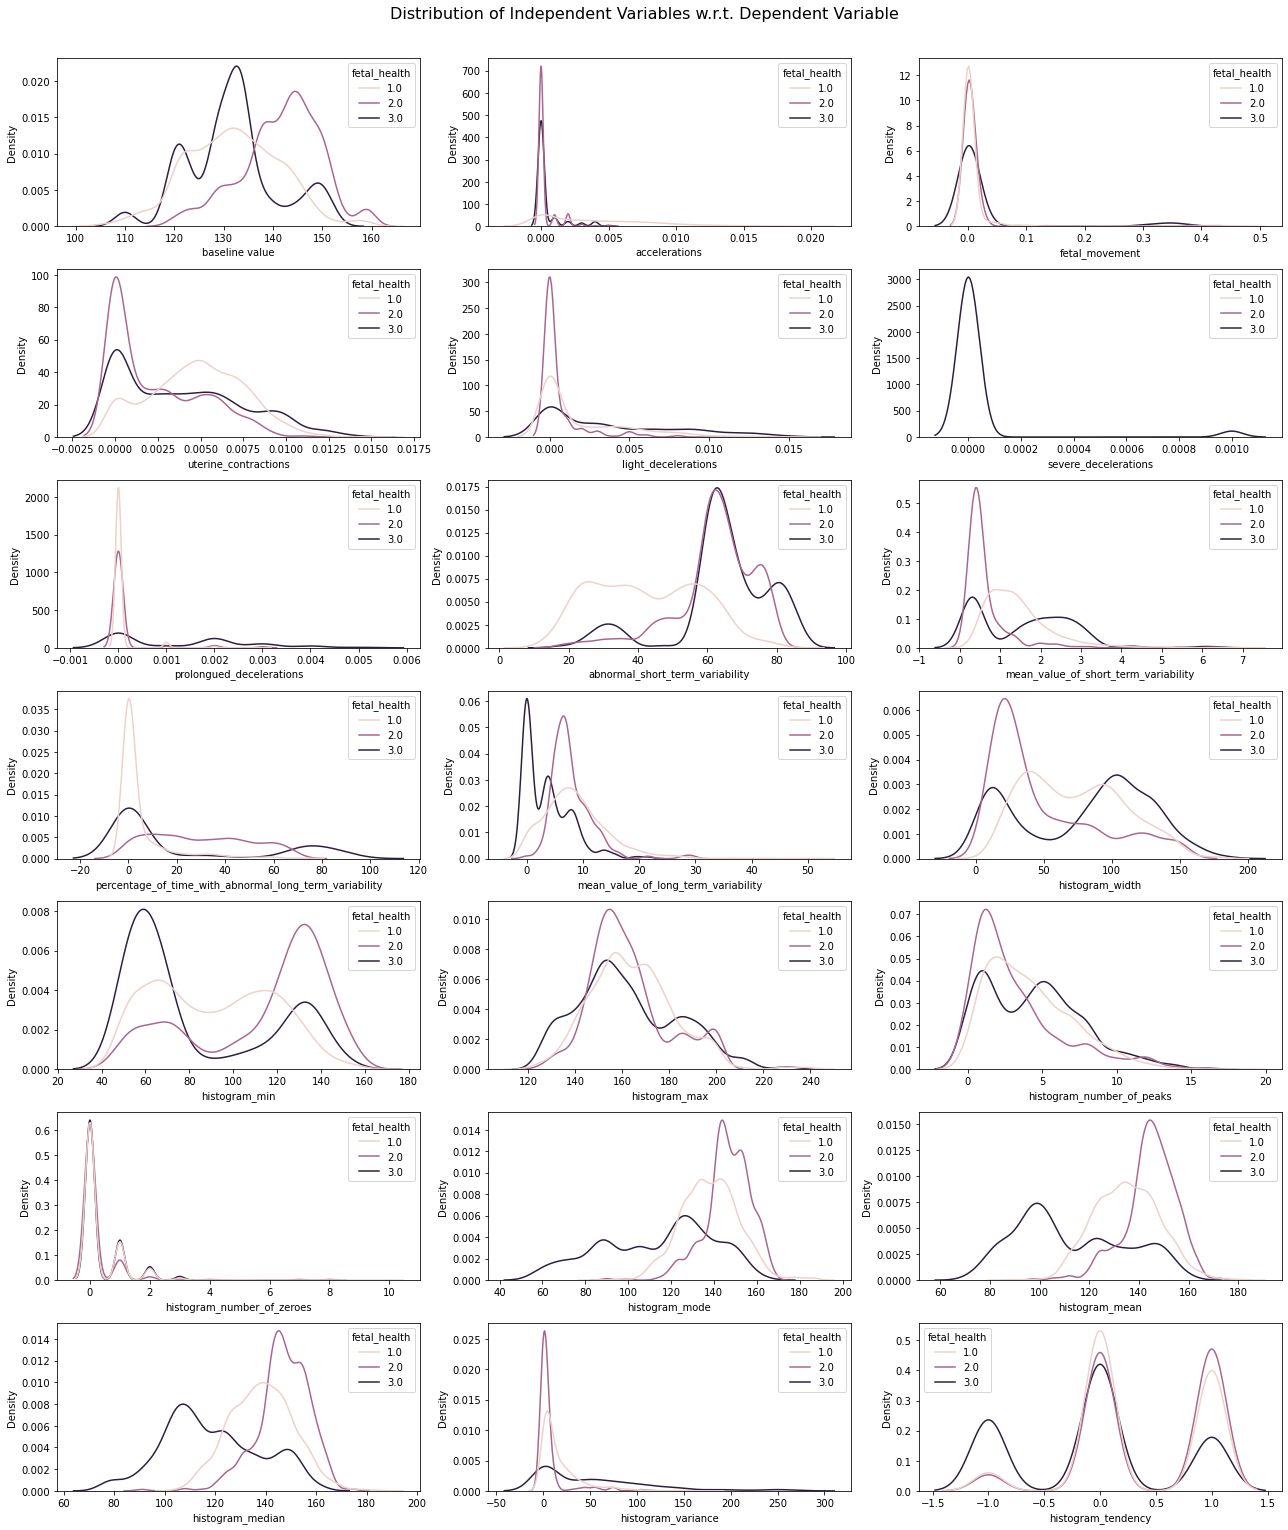

In [153]:
#change color to match color scheme
#maybe reduce 

plt.figure(figsize=(18,21))
for i,col in enumerate(p_upsampled.columns[:-1]):
    plt.subplot(7,3,i+1)
    sns.kdeplot(x=p_upsampled[col],hue=p_upsampled['fetal_health'])
plt.suptitle('Distribution of Independent Variables vs Fetal_health', size=16, y=1.01)
plt.tight_layout()
plt.show()

# Modeling

In [154]:
#assigning values to features as X and target as y
X=p_upsampled.drop(["fetal_health"],axis=1)
y=p_upsampled["fetal_health"]

target = p_upsampled['fetal_health']
#spliting test and training sets 70/30
X_train, X_test, y_train,y_test = train_test_split(p_upsampled,y,test_size=0.3,stratify = target, random_state=42)

#pipline?
models = {"LR": LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "DT" : DecisionTreeClassifier(),
          'RFC' : RandomForestClassifier(),
          'DTC' : DecisionTreeClassifier(),
          }

In [155]:
#Logistic Regression
mod = LogisticRegression().fit(X_train, y_train)
y_pred = LogisticRegression().predict(X_test)
mod.score(X_test,y_test)

C:\Users\ainaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8087248322147651

In [156]:
#Random Forest?

In [157]:
#Decision Tree?

# Predictions

#model


# conclusion